## 任务3.1

任务 3.1 在同一画布中，绘制反映两种流失情况下不同年龄客户量占比的
折线图，x 轴为年龄，y 轴为占比数值。

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']

In [52]:
df_long = pd.read_excel('../result/result1_2.xlsx')

In [53]:
df_long.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1


In [54]:
df1 = df_long[df_long['Exited']==1]
df2 = df_long[df_long['Exited']==0]
print(len(df1))
print(len(df2))

1837
7343


In [55]:
df1.head(3)

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1


In [56]:
df1_pivot = df1.pivot_table(index='Age', aggfunc='count')

In [57]:
df2_pivot = df2.pivot_table(index='Age', aggfunc='count')

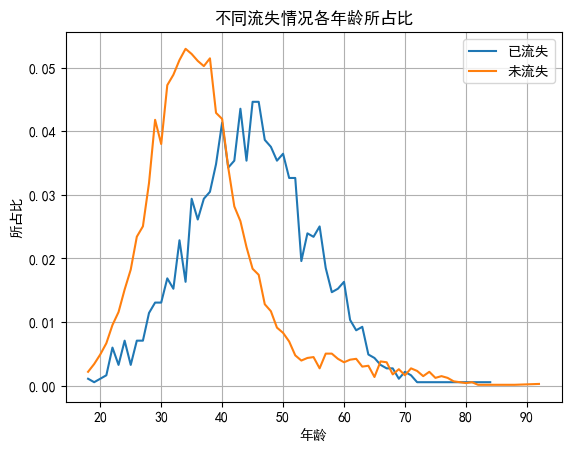

In [58]:
plt.figure()
plt.plot(df1_pivot.index, df1_pivot['Exited']/1837, label='已流失')
plt.plot(df2_pivot.index, df2_pivot['Exited']/7343, label='未流失')
plt.legend()
plt.xlabel('年龄')
plt.ylabel('所占比')
plt.grid()
plt.title('不同流失情况各年龄所占比')
plt.savefig('../image/不同流失情况各年龄所占比.png', dpi=600)
plt.show()

## 任务3.2

任务 3.2 在同一画布中，绘制反映两种流失情况下客户信用资格与年龄分
布的散点图，x 轴为年龄，y 轴为信用资格。

In [59]:
df1_pivot = df1.pivot_table(index='Age', aggfunc='mean')
df2_pivot = df2.pivot_table(index='Age', aggfunc='mean')

In [60]:
df2.pivot_table(index='Age', aggfunc='mean')

,Balance,CreditScore,CustomerId,EstimatedSalary,Exited,Gender,HasCrCard,IsActiveMember,NumOfProducts,Tenure
Age,,,,,,,,,,
18,81018.321875,680.562500,1.569584e+07,76826.219375,0,0.250000,0.687500,0.562500,1.562500,4.750000
19,67696.952800,668.920000,1.569768e+07,98217.190000,0,0.320000,0.800000,0.520000,1.400000,4.920000
20,69381.967222,662.194444,1.569942e+07,98014.077778,0,0.277778,0.694444,0.527778,1.611111,5.166667
21,71304.826735,648.734694,1.569505e+07,100643.956327,0,0.612245,0.714286,0.612245,1.653061,4.877551
22,65380.415000,631.757143,1.568421e+07,94744.890000,0,0.514286,0.685714,0.571429,1.528571,5.657143
...,...,...,...,...,...,...,...,...,...,...
82,0.000000,700.000000,1.581086e+07,182055.360000,0,1.000000,0.000000,1.000000,2.000000,2.000000
83,123356.630000,678.000000,1.562164e+07,92934.410000,0,0.000000,0.000000,1.000000,1.000000,6.000000
84,92242.340000,537.000000,1.579802e+07,186235.980000,0,0.000000,1.000000,1.000000,1.000000,8.000000


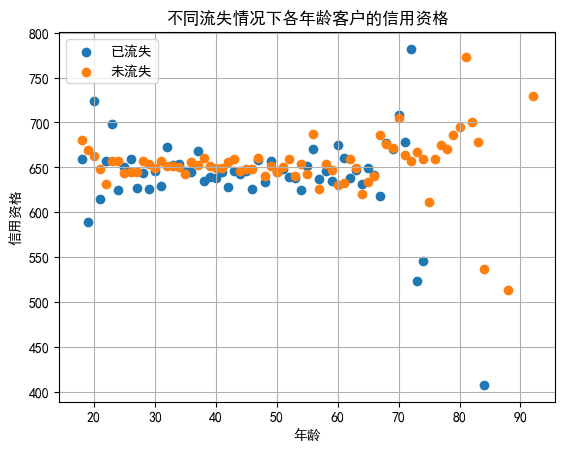

In [61]:
plt.figure()
plt.scatter(df1_pivot.index, df1_pivot['CreditScore'], label='已流失')
plt.scatter(df2_pivot.index, df2_pivot['CreditScore'], label='未流失')
plt.legend()
plt.xlabel('年龄')
plt.ylabel('信用资格')
plt.grid()
plt.title('不同流失情况下各年龄客户的信用资格')
plt.savefig('../image/不同流失情况下各年龄客户的信用资格', dpi=600)
plt.show()

## 任务3.3

任务 3.3 构造包含各账号户龄在不同流失情况下的客户量占比透视表（详见表 4），并在同一画布中绘制反映两种流失情况的客户各账号户龄占比量的堆
叠柱状图，x 轴为客户的户龄，y 轴为占比量。

In [62]:
df1['Tenure'].value_counts() # 已流失

1     212
9     197
5     196
3     187
4     186
2     180
8     178
6     178
7     149
10     89
0      85
Name: Tenure, dtype: int64

In [63]:
df2['Tenure'].value_counts() # 未流失

7     788
2     774
8     760
5     742
1     740
3     730
4     728
9     712
6     712
10    358
0     299
Name: Tenure, dtype: int64

In [64]:
df_long['Tenure'].value_counts()

2     954
1     952
8     938
5     938
7     937
3     917
4     914
9     909
6     890
10    447
0     384
Name: Tenure, dtype: int64

In [65]:
dict1 = dict(df1['Tenure'].value_counts())
dict2 = dict(df2['Tenure'].value_counts())
dict3 = dict(df_long['Tenure'].value_counts())

In [66]:
ls1=[]
for i in range(0,11):
    temp = dict1[i]/dict3[i]
    ls1.append(temp)

In [67]:
ls2=[]
for i in range(0,11):
    temp = dict2[i]/dict3[i]
    ls2.append(temp)

In [68]:
ls1

[0.22135416666666666,
 0.22268907563025211,
 0.18867924528301888,
 0.2039258451472192,
 0.20350109409190373,
 0.208955223880597,
 0.2,
 0.15901814300960512,
 0.18976545842217485,
 0.21672167216721672,
 0.19910514541387025]

In [69]:
ls2

[0.7786458333333334,
 0.7773109243697479,
 0.8113207547169812,
 0.7960741548527808,
 0.7964989059080962,
 0.7910447761194029,
 0.8,
 0.8409818569903948,
 0.8102345415778252,
 0.7832783278327833,
 0.8008948545861297]

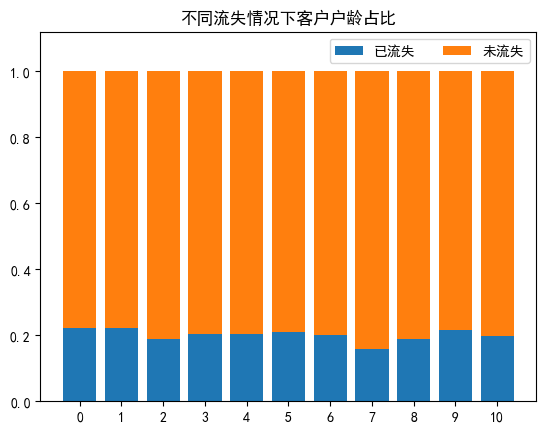

In [70]:
plt.figure()
plt.bar(list(range(0,11)), ls1, label='已流失')
plt.bar(list(range(0,11)), ls2, bottom=ls1, label='未流失')
plt.legend(ncol=2)
plt.ylim(0,1.12)
plt.xticks(list(range(0,11)))
plt.title('不同流失情况下客户户龄占比')
plt.savefig('../image/不同流失情况下客户户龄占比.png', dpi=600)
plt.show()

## 3.4(1)

(1) 按照表 5 和表 6 对账号户龄和客户金融资产进行划分，并分别进行特征
编码作为新的客户特征，其中客户状态存于“Status”列，资产阶段存于“AssetStage”
列，编码结果保存到文件“result3.xlsx”中。

In [71]:
def getstatus(g):
    if 0<=g<=3:
        return '新客户'
    elif 3<g<=6:
        return '稳定客户'
    elif g>6:
        return '老客户'
    
def getasset(g):
    if 0<=g<=50000:
        return '低资产'
    elif 50000<g<=90000:
        return '中下资产'
    elif 90000<g<120000:
        return '中上资产'
    elif g>120000:
        return '高资产'

In [72]:
df_long['Status'] = df_long.apply(lambda x: getstatus(x['Tenure']), axis=1)
df_long['AssetStage'] = df_long.apply(lambda x: getasset(x['Balance']), axis=1)

In [73]:
df_long.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Status,AssetStage
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1,新客户,高资产
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1,老客户,低资产
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1,老客户,中上资产
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1,新客户,低资产
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1,新客户,低资产


In [74]:
df_long.to_excel('../result/result3.xlsx', index=False)

## 3.4(2)

(2) 统计新、老客户在各资产阶段中流失的客户量，在同一画布中绘制热力
图，热力图颜色的最大和最小取值设为 1300 和 100，并在报告中对结果进行必
要分析。

In [75]:
df_long[['Status', 'AssetStage', 'Exited']].pivot_table(index=['Status', 'AssetStage'], aggfunc='sum')

Exited
Status AssetStage        
新客户    中上资产           181
       中下资产            57
       低资产            180
       高资产            246
稳定客户   中上资产           151
       中下资产            51
       低资产            152
       高资产            206
老客户    中上资产           175
       中下资产            53
       低资产            142
       高资产            243